# Exploratory Data Analysis in Python

This code is main edited by Enze Wang

Fixed by Yicen Liu and Hua Tong

# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to provide you some important information before we build model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import itertools
from collections import Counter
from nltk import FreqDist
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud
from nltk import sent_tokenize, word_tokenize, PorterStemmer, pos_tag 
from nltk.corpus import stopwords
from nltk.text import TextCollection
from nltk.corpus import wordnet
import nltk.tokenize as nt
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /Users/enze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/enze/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/enze/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/enze/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
pizza_business = pd.read_csv("data/pizza_business.csv")
pizza_review = pd.read_csv("data/pizza_review.csv")
pizza_tip = pd.read_csv("data/pizza_tip.csv")
pizza_user = pd.read_csv("data/pizza_user.csv")

In [3]:
pizza_review

Unnamed: 0               review_id                 user_id  \
0               0  hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw   
1               1  EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw   
2               2  RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg   
3               3  0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw   
4               4  sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg   
...           ...                     ...                     ...   
67151       67151  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog   
67152       67152  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA   
67153       67153  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA   
67154       67154  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w   
67155       67155  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw   

                  business_id  stars  useful  funny  cool  \
0      J9f-9Prw2YVM-fiZqv2fmQ      2       0      1     1   
1      lpel3pRFAzlow7u2TJMz4Q      4       3      0     0   
2      Zja7ykq3icDzkN20XX6j1w      5       1      0     1   
3      hr0vxeTzlHx6fTpSSmu2AA      5       1      0     0   
4      F4kjKxXXyn3e-BYVb1mWcg      4       0      0     0   
...                       ...    ...     ...    ...   ...   
67151  nR3u-wQ99bop6IdGoU38KQ      1       1      0     0   
67152  yT1Ad3auuw1jAJEZHr7Yqw      5       1      1     1   
67153  R13VkcyUIU3xG2fRFbBvBA      4       3      3     3   
67154  M-caugKzJ9qLOmCBfD9Nyg      1       1      0     0   
67155  o_dWM_hlpgjjd7F15UPjZw      3       0      0     0   

                                                    text                 date  
0      Parking is tough to get here so I don't get to...  2013-09-04 04:35:27  
1      The server had an extensive knowledge of wines...  2015-04-28 19:28:12  
2      Fast Forward\n\nEvery trip from NYC to Pitt in...  2013-07-12 23:08:35  
3      By far my favorite Cleveland/Akron restaurant!...  2013-12-07 01:09:23  
4      All food is good here I usually get the Italia...  2014-10-27 01:42:40  
...                                                  ...                  ...  
67151  I'm originally from the other side of Ohio and...  2019-09-21 00:24:03  
67152  Yes, yes, YES!! We loved going to the place in...  2019-09-03 04:32:16  
67153  Went here for a lunch meeting amidst s typical...  2019-12-11 16:18:26  
67154  My wife and I have eaten at La Brioche at leas...  2017-06-13 02:14:53  
67155  First let me say Lindys in Columbus is one of ...  2019-11-16 14:37:10  

[67156 rows x 10 columns]

In [4]:
pizza_business=pizza_business.rename(columns={'stars':'business_stars'})
pizza_business

Unnamed: 0             business_id                        name  \
0              0  ZkzutF0P_u0C0yTulwaHkA            Lelulos Pizzeria   
1              1  39lLJK_rrYY2NYomSsQdUA               Marco's Pizza   
2              2  0y6alZmSLnPzmG5_kP5Quw                 J J's Pizza   
3              3  _Kp1IPTi17wBywYOd30raA                   Pizza Hut   
4              4  crBw_Hq3gCkppirgjnIl4A         Famous Yeti's Pizza   
...          ...                     ...                         ...   
1555        1555  Qtv6iGDAHBmAKBgl40JgLw     Blaze Fast-Fire'd Pizza   
1556        1556  ZZGs9idRiKRHue2RyXw9uA               Marco's Pizza   
1557        1557  v8GgrqLTs_NZZl2tkyvOgA  Cleveland Clinic Cafeteria   
1558        1558  qWcaGio9JsqrvgmQiIRtIQ         Country Style Pizza   
1559        1559  AlwKuzyrrxlZ04ktebwmcA                   Pizza Pit   

                            address              city   latitude  longitude  \
0               311 Unity Center Rd        Pittsburgh  40.489996 -79.779288   
1                24335 Chagrin Blvd         Cleveland  41.465789 -81.506349   
2                   20542 Lorain Rd         Cleveland  41.448341 -81.847644   
3              8609 University Blvd        Pittsburgh  40.507268 -80.222632   
4                     971 N Page St           Madison  42.926526 -89.222592   
...                             ...               ...        ...        ...   
1555            2610 N Prospect Ave  Urbana-Champaign  40.147209 -88.254940   
1556              5877 Broadview Rd         Cleveland  41.403398 -81.689779   
1557  9500 Euclid Ave, Bldg C, Fl 1         Cleveland  41.501753 -81.621448   
1558                  536 Dewey Ave        Pittsburgh  40.356300 -80.110600   
1559                    13 Atlas Ct           Madison  43.086793 -89.306868   

      business_stars  review_count  \
0                4.0            31   
1                2.5            11   
2                4.5            21   
3                2.0            14   
4                4.5            60   
...              ...           ...   
1555             3.5            55   
1556             3.0            10   
1557             3.0            12   
1558             4.0            39   
1559             2.5            19   

                                             categories  ...  \
0                                    Restaurants, Pizza  ...   
1                                    Restaurants, Pizza  ...   
2                           Pizza, Italian, Restaurants  ...   
3            Restaurants, Pizza, Chicken Wings, Italian  ...   
4                                    Restaurants, Pizza  ...   
...                                                 ...  ...   
1555               Fast Food, Restaurants, Pizza, Salad  ...   
1556           Chicken Wings, Restaurants, Pizza, Salad  ...   
1557  Bakeries, Food, Do-It-Yourself Food, Restauran...  ...   
1558     Food, Restaurants, Bakeries, Pizza, Sandwiches  ...   
1559  Shopping, Party & Event Planning, Caterers, To...  ...   

     BusinessParking_valet BusinessParking_validated BusinessParking  \
0                    False                     False             NaN   
1                      NaN                       NaN             NaN   
2                    False                     False             NaN   
3                    False                     False             lot   
4                    False                     False             lot   
...                    ...                       ...             ...   
1555                 False                     False             NaN   
1556                 False                     False             NaN   
1557                 False                     False             NaN   
1558                 False                     False          street   
1559                 False                     False             NaN   

       GoodForMeal GoodForMeal_breakfast GoodForMeal_brunch  \
0              NaN                   N

In [5]:
pizza_review_business=pd.merge(pizza_review, pizza_business, how='left', on='business_id')
pizza_review_business

Unnamed: 0_x               review_id                 user_id  \
0                 0  hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw   
1                 1  EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw   
2                 2  RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg   
3                 3  0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw   
4                 4  sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg   
...             ...                     ...                     ...   
67151         67151  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog   
67152         67152  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA   
67153         67153  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA   
67154         67154  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w   
67155         67155  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw   

                  business_id  stars  useful  funny  cool  \
0      J9f-9Prw2YVM-fiZqv2fmQ      2       0      1     1   
1      lpel3pRFAzlow7u2TJMz4Q      4       3      0     0   
2      Zja7ykq3icDzkN20XX6j1w      5       1      0     1   
3      hr0vxeTzlHx6fTpSSmu2AA      5       1      0     0   
4      F4kjKxXXyn3e-BYVb1mWcg      4       0      0     0   
...                       ...    ...     ...    ...   ...   
67151  nR3u-wQ99bop6IdGoU38KQ      1       1      0     0   
67152  yT1Ad3auuw1jAJEZHr7Yqw      5       1      1     1   
67153  R13VkcyUIU3xG2fRFbBvBA      4       3      3     3   
67154  M-caugKzJ9qLOmCBfD9Nyg      1       1      0     0   
67155  o_dWM_hlpgjjd7F15UPjZw      3       0      0     0   

                                                    text                 date  \
0      Parking is tough to get here so I don't get to...  2013-09-04 04:35:27   
1      The server had an extensive knowledge of wines...  2015-04-28 19:28:12   
2      Fast Forward\n\nEvery trip from NYC to Pitt in...  2013-07-12 23:08:35   
3      By far my favorite Cleveland/Akron restaurant!...  2013-12-07 01:09:23   
4      All food is good here I usually get the Italia...  2014-10-27 01:42:40   
...                                                  ...                  ...   
67151  I'm originally from the other side of Ohio and...  2019-09-21 00:24:03   
67152  Yes, yes, YES!! We loved going to the place in...  2019-09-03 04:32:16   
67153  Went here for a lunch meeting amidst s typical...  2019-12-11 16:18:26   
67154  My wife and I have eaten at La Brioche at leas...  2017-06-13 02:14:53   
67155  First let me say Lindys in Columbus is one of ...  2019-11-16 14:37:10   

       ...  BusinessParking_valet BusinessParking_validated BusinessParking  \
0      ...                  False                     False          street   
1      ...                  False                     False      lot street   
2      ...                  False                     False          street   
3      ...                  False                     False             lot   
4      ...                  False                     False             lot   
...    ...                    ...                       ...             ...   
67151  ...                  False                     False             lot   
67152  ...                  False                     False             lot   
67153  ...                  False                     False             lot   
67154  ...                  False                     False             lot   
67155  ...                  False                     False             NaN   

                    GoodForMeal  GoodForMeal_breakfast  GoodForMeal_brunch  \
0               lunch latenight                  False               False   
1      dessert dinner latenight                  False               False   
2                  lunch dinner                  False               False   
3                        dinner                  False               False   
4                           NaN                    NaN                 NaN   
...                         ...

In [6]:
pizza_review_business=pizza_review_business.drop(["Unnamed: 0_x","Unnamed: 0_y","useful","funny","cool"],axis=1)

In [7]:
pizza_review_business

review_id                 user_id             business_id  \
0      hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw  J9f-9Prw2YVM-fiZqv2fmQ   
1      EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw  lpel3pRFAzlow7u2TJMz4Q   
2      RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg  Zja7ykq3icDzkN20XX6j1w   
3      0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw  hr0vxeTzlHx6fTpSSmu2AA   
4      sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg  F4kjKxXXyn3e-BYVb1mWcg   
...                       ...                     ...                     ...   
67151  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog  nR3u-wQ99bop6IdGoU38KQ   
67152  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA  yT1Ad3auuw1jAJEZHr7Yqw   
67153  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA  R13VkcyUIU3xG2fRFbBvBA   
67154  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w  M-caugKzJ9qLOmCBfD9Nyg   
67155  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw  o_dWM_hlpgjjd7F15UPjZw   

       stars                                               text  \
0          2  Parking is tough to get here so I don't get to...   
1          4  The server had an extensive knowledge of wines...   
2          5  Fast Forward\n\nEvery trip from NYC to Pitt in...   
3          5  By far my favorite Cleveland/Akron restaurant!...   
4          4  All food is good here I usually get the Italia...   
...      ...                                                ...   
67151      1  I'm originally from the other side of Ohio and...   
67152      5  Yes, yes, YES!! We loved going to the place in...   
67153      4  Went here for a lunch meeting amidst s typical...   
67154      1  My wife and I have eaten at La Brioche at leas...   
67155      3  First let me say Lindys in Columbus is one of ...   

                      date                          name  \
0      2013-09-04 04:35:27         Original Hot Dog Shop   
1      2015-04-28 19:28:12               Humble Wine Bar   
2      2013-07-12 23:08:35                Aiello's Pizza   
3      2013-12-07 01:09:23                       Russo's   
4      2014-10-27 01:42:40  Tnt Dynamite Pizza & Hoagies   
...                    ...                           ...   
67151  2019-09-21 00:24:03                   Jet's Pizza   
67152  2019-09-03 04:32:16                    Mercurio’s   
67153  2019-12-11 16:18:26                    56 Kitchen   
67154  2017-06-13 02:14:53          La Brioche True Food   
67155  2019-11-16 14:37:10           Lindey's Lake House   

                       address        city   latitude  ...  \
0              3901 Forbes Ave  Pittsburgh  40.442147  ...   
1            15400 Detroit Ave   Cleveland  41.485075  ...   
2              2112 Murray Ave  Pittsburgh  40.433261  ...   
3                4895 State Rd   Cleveland  41.202242  ...   
4            450 Pittsburgh St  Pittsburgh  40.540954  ...   
...                        ...         ...        ...  ...   
67151  35535 Euclid Ave, Ste 8   Cleveland  41.626690  ...   
67152         1335 Freeport Rd  Pittsburgh  40.489726  ...   
67153          1433 Som Ctr Rd   Cleveland  41.521496  ...   
67154      2862 University Ave     Madison  43.075354  ...   
67155  2101 Richmond Rd, Ste L   Cleveland  41.500783  ...   

       BusinessParking_valet  BusinessParking_validated  BusinessParking  \
0                      False                      False           street   
1                      False                      False       lot street   
2                      False                      False           street   
3                      False                      False              lot   
4                      False                      False              lot   
...                      ...                        ...              ...   
67151                  False                      False              lot   
67152                  False                      False              lot   
67153                  False                      False              lot   
67154           

# Location

In [8]:
City=pizza_review_business['city'].tolist()
Location=['Pittsburgh','Cleveland','Madison','Urbana-Champaign']
Count=[City.count('Pittsburgh'),City.count('Cleveland'),City.count('Madison'),City.count('Urbana-Champaign')]

In [9]:
Location_Count=pd.DataFrame(list(zip(Location,Count)),columns=['Location','Count'])
Location_Count

Location  Count
0        Pittsburgh  29317
1         Cleveland  26660
2           Madison   8685
3  Urbana-Champaign   2494

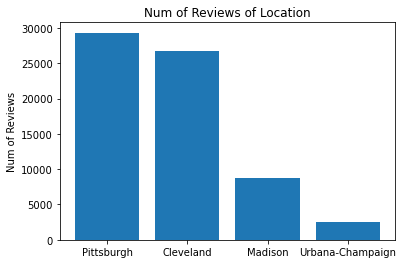

In [10]:
plt.title('Num of Reviews of Location')
plt.ylabel('Num of Reviews')
plt.bar(Location,height=Count)
plt.savefig('figure/Num_of_Reviews_of_Location.png')

Most of reviews are from Pittsburgh and Cleveland. 

# Stars

In [11]:
set(pizza_review_business['stars'])

{1, 2, 3, 4, 5}

In [12]:
Stars=["1","2","3","4","5"]
pizza_review_business['stars'].tolist().count(1)

9829

In [13]:
pizza_review_business['stars'].tolist().count(5)

26769

In [14]:
Counter(pizza_review_business['stars']).get(5)

26769

In [15]:
len(pizza_review_business['stars'].tolist())

67156

In [16]:
Distri=[Counter(pizza_review_business['stars']).get(1)/len(pizza_review_business['stars'].tolist()),
Counter(pizza_review_business['stars']).get(2)/len(pizza_review_business['stars'].tolist()),
Counter(pizza_review_business['stars']).get(3)/len(pizza_review_business['stars'].tolist()),
Counter(pizza_review_business['stars']).get(4)/len(pizza_review_business['stars'].tolist()),
Counter(pizza_review_business['stars']).get(5)/len(pizza_review_business['stars'].tolist())]

In [17]:
Distri

[0.14636071237119544,
 0.09114598844481506,
 0.11894692953719697,
 0.24493716123652393,
 0.39860920841026865]

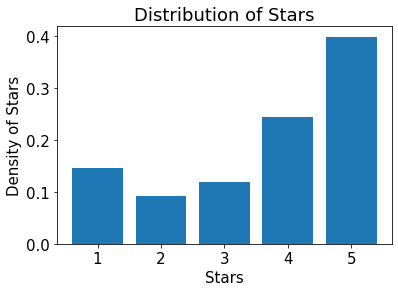

In [18]:
X = np.arange(1,6)
plt.rcParams.update({'font.size': 15})
plt.title('Distribution of Stars')
plt.ylabel('Density of Stars')
plt.xlabel('Stars')
plt.bar(X,Distri)
plt.xticks([1,2,3,4,5])
plt.savefig('figure/Distribution_of_Stars.png')

The distribution of stars is polarization. It seems that when people make star rating with their review, they are tend to be emotional. Either positive or negative. It is rare for them to make star rating with 3 or 2

# Stars & Location

In [19]:

star_Madison=pizza_review_business[pizza_review_business['city']=='Madison']['stars'].tolist()

star_Cleveland=pizza_review_business[pizza_review_business['city']=='Cleveland']['stars'].tolist()

star_Pittsburgh=pizza_review_business[pizza_review_business['city']=='Pittsburgh']['stars'].tolist()

star_Urbana_Champaign=pizza_review_business[pizza_review_business['city']=='Urbana-Champaign']['stars'].tolist()

In [20]:
import pandas
from collections import Counter
star_counts = Counter(star_Madison)
Madison=[star_counts.get(1),star_counts.get(2),star_counts.get(3),star_counts.get(4),star_counts.get(5)]
Madison=[x/len(star_Madison) for x in Madison]
star_counts = Counter(star_Cleveland)
Cleveland=[star_counts.get(1),star_counts.get(2),star_counts.get(3),star_counts.get(4),star_counts.get(5)]
Cleveland=[x/len(star_Cleveland) for x in Cleveland]
star_counts = Counter(star_Pittsburgh)
Pittsburgh=[star_counts.get(1),star_counts.get(2),star_counts.get(3),star_counts.get(4),star_counts.get(5)]
Pittsburgh=[x/len(star_Pittsburgh) for x in Pittsburgh]
star_counts = Counter(star_Urbana_Champaign)
Urbana_Champaign=[star_counts.get(1),star_counts.get(2),star_counts.get(3),star_counts.get(4),star_counts.get(5)]
Urbana_Champaign=[x/len(star_Urbana_Champaign) for x in Urbana_Champaign]

In [21]:
star_city=pd.DataFrame(np.array([[1,2,3,4,5],Madison,Cleveland,Pittsburgh,Urbana_Champaign]).T.tolist(),columns=['stars','Madison','Cleveland','Pittsburgh','Urbana-Champaign'])

In [22]:
star_city

stars   Madison  Cleveland  Pittsburgh  Urbana-Champaign
0    1.0  0.122510   0.145649    0.151073          0.181636
1    2.0  0.094761   0.089760    0.088515          0.124298
2    3.0  0.124467   0.113091    0.121397          0.133520
3    4.0  0.264134   0.234209    0.248934          0.245790
4    5.0  0.394128   0.417292    0.390081          0.314755

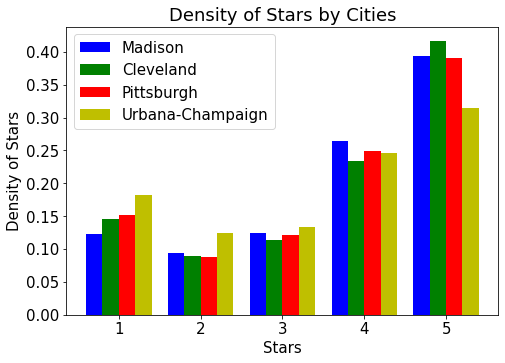

In [23]:
X = np.arange(1,6)
plt.rcParams.update({'font.size': 15})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, star_city["Madison"], color = 'b', width = 0.2)
ax.bar(X - 0.1, star_city["Cleveland"], color = 'g', width = 0.2)
ax.bar(X + 0.1, star_city["Pittsburgh"], color = 'r', width = 0.2)
ax.bar(X + 0.3, star_city["Urbana-Champaign"], color = 'y', width = 0.2)
plt.title('Density of Stars by Cities')
plt.ylabel('Density of Stars')
plt.xlabel('Stars')
ax.legend(labels=['Madison','Cleveland','Pittsburgh','Urbana-Champaign'])
plt.savefig('figure/Density_of_Stars.png')

This picture show you the density of stars by different cities, as you can see, the Madison has the smallest proportion of 1 star and Cleveland has the largest proportion of 5 stars in their own distribution of stars. 

# Time

In [24]:
DateTime=pizza_review_business['date'].tolist()
Date=[]
for i in DateTime:
    Date.append(i[0:7])
Review_ByDate=pizza_review_business[['date','stars']]
Review_ByDate["Date"]=Date

/Users/enze/opt/anaconda3/envs/STAT628/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
Date=list(set(Date))

In [26]:
All_Date=pd.DataFrame(Date,columns=['Date']).sort_values(by=['Date'])

In [27]:
All_Date.reset_index(drop=True, inplace=True)

In [28]:
Review_ByDateStar=Review_ByDate.groupby(['stars', 'Date']).size().reset_index(name='counts')
Star1=Review_ByDateStar[Review_ByDateStar["stars"]==1]
Star1=Star1.rename(columns={'counts':'Star1'})
Star1=Star1.drop(["stars"],axis=1)
Star2=Review_ByDateStar[Review_ByDateStar["stars"]==2]
Star2=Star2.rename(columns={'counts':'Star2'})
Star2=Star2.drop(["stars"],axis=1)
Star3=Review_ByDateStar[Review_ByDateStar["stars"]==3]
Star3=Star3.rename(columns={'counts':'Star3'})
Star3=Star3.drop(["stars"],axis=1)
Star4=Review_ByDateStar[Review_ByDateStar["stars"]==4]
Star4=Star4.rename(columns={'counts':'Star4'})
Star4=Star4.drop(["stars"],axis=1)
Star5=Review_ByDateStar[Review_ByDateStar["stars"]==5]
Star5=Star5.rename(columns={'counts':'Star5'})
Star5=Star5.drop(["stars"],axis=1)

In [29]:
All_data=pd.merge(All_Date, Star1, how='left', on='Date')
All_data=pd.merge(All_data, Star2, how='left', on='Date')
All_data=pd.merge(All_data, Star3, how='left', on='Date')
All_data=pd.merge(All_data, Star4, how='left', on='Date')
All_data=pd.merge(All_data, Star5, how='left', on='Date')

In [30]:
All_data.sort_values(by=['Date'])
All_data

Date  Star1  Star2  Star3  Star4  Star5
0    2004-10    NaN    NaN    NaN    2.0    1.0
1    2005-03    NaN    NaN    1.0    1.0    2.0
2    2005-04    NaN    NaN    NaN    1.0    NaN
3    2005-05    NaN    NaN    1.0    NaN    3.0
4    2005-10    NaN    1.0    1.0    5.0    3.0
..       ...    ...    ...    ...    ...    ...
170  2019-08  180.0  103.0  130.0  217.0  492.0
171  2019-09  168.0   88.0   96.0  183.0  423.0
172  2019-10  186.0   72.0  116.0  184.0  391.0
173  2019-11  124.0   72.0   70.0  160.0  360.0
174  2019-12   70.0   28.0   38.0   60.0  148.0

[175 rows x 6 columns]

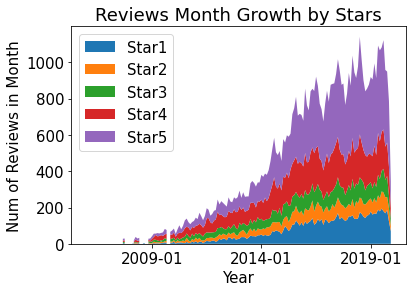

In [31]:
All_Date=All_data["Date"].tolist()
All_Star1=All_data["Star1"].tolist()
All_Star2=All_data["Star2"].tolist()
All_Star3=All_data["Star3"].tolist()
All_Star4=All_data["Star4"].tolist()
All_Star5=All_data["Star5"].tolist()
plt.stackplot(All_Date,All_Star1,All_Star2,All_Star3,All_Star4,All_Star5, labels=["Star1","Star2","Star3","Star4","Star5"])
plt.xticks(['2009-01','2014-01','2019-01'])
plt.legend(loc='upper left')
plt.title('Reviews Month Growth by Stars')
plt.ylabel('Num of Reviews in Month')
plt.xlabel('Year')
plt.savefig('figure/Reviews_Month_Growth_by_Stars.png')

As you can see, most of our reviews are from 2015 to 2019. 

# Word Frequence

Here we want to calculate the word frequence in all review and find important word for further study. 

# Attention.

There are several word split process in our whole study. Here is just find important noun and adj for further study so we do not deal with stopword. The word split process in review attitude part we will redo stopword step and do more carefully. 

In [32]:
Review=pizza_review_business["text"]

In [33]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

There is no special word in stop_words, the special word means that they are important for us to study for example "food". "good"

# Attention: 

stop words like "not" "n't" is very important in review attitude. But this step we will first ignore them because we only care about the noun and adj.

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Attention: Code running for long time below:

In [35]:
Word_Cloud_review=[]
All_Word=[]
for i in range(len(Review)):
    review=Review[i]
    review=review.lower()
    review="".join([i for i in review if i not in string.punctuation])
    review=nltk.word_tokenize(review)
    review=[i for i in review if i not in stop_words]
    review=[lmtzr.lemmatize(i) for i in review]
    # Remove word too short, only number and no English alphabet.
    review=[i for i in review if len(i)>1]
    review=[i for i in review if i.isdigit() is False]
    review=[i for i in review if any(c.isalpha() for c in i) is True]
    All_Word.extend(review)
    Word_Cloud_review.append(" ".join(review))

In [36]:
pizza_review_business["clean_review"]=Word_Cloud_review
pizza_review_business

review_id                 user_id             business_id  \
0      hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw  J9f-9Prw2YVM-fiZqv2fmQ   
1      EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw  lpel3pRFAzlow7u2TJMz4Q   
2      RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg  Zja7ykq3icDzkN20XX6j1w   
3      0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw  hr0vxeTzlHx6fTpSSmu2AA   
4      sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg  F4kjKxXXyn3e-BYVb1mWcg   
...                       ...                     ...                     ...   
67151  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog  nR3u-wQ99bop6IdGoU38KQ   
67152  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA  yT1Ad3auuw1jAJEZHr7Yqw   
67153  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA  R13VkcyUIU3xG2fRFbBvBA   
67154  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w  M-caugKzJ9qLOmCBfD9Nyg   
67155  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw  o_dWM_hlpgjjd7F15UPjZw   

       stars                                               text  \
0          2  Parking is tough to get here so I don't get to...   
1          4  The server had an extensive knowledge of wines...   
2          5  Fast Forward\n\nEvery trip from NYC to Pitt in...   
3          5  By far my favorite Cleveland/Akron restaurant!...   
4          4  All food is good here I usually get the Italia...   
...      ...                                                ...   
67151      1  I'm originally from the other side of Ohio and...   
67152      5  Yes, yes, YES!! We loved going to the place in...   
67153      4  Went here for a lunch meeting amidst s typical...   
67154      1  My wife and I have eaten at La Brioche at leas...   
67155      3  First let me say Lindys in Columbus is one of ...   

                      date                          name  \
0      2013-09-04 04:35:27         Original Hot Dog Shop   
1      2015-04-28 19:28:12               Humble Wine Bar   
2      2013-07-12 23:08:35                Aiello's Pizza   
3      2013-12-07 01:09:23                       Russo's   
4      2014-10-27 01:42:40  Tnt Dynamite Pizza & Hoagies   
...                    ...                           ...   
67151  2019-09-21 00:24:03                   Jet's Pizza   
67152  2019-09-03 04:32:16                    Mercurio’s   
67153  2019-12-11 16:18:26                    56 Kitchen   
67154  2017-06-13 02:14:53          La Brioche True Food   
67155  2019-11-16 14:37:10           Lindey's Lake House   

                       address        city   latitude  ...  \
0              3901 Forbes Ave  Pittsburgh  40.442147  ...   
1            15400 Detroit Ave   Cleveland  41.485075  ...   
2              2112 Murray Ave  Pittsburgh  40.433261  ...   
3                4895 State Rd   Cleveland  41.202242  ...   
4            450 Pittsburgh St  Pittsburgh  40.540954  ...   
...                        ...         ...        ...  ...   
67151  35535 Euclid Ave, Ste 8   Cleveland  41.626690  ...   
67152         1335 Freeport Rd  Pittsburgh  40.489726  ...   
67153          1433 Som Ctr Rd   Cleveland  41.521496  ...   
67154      2862 University Ave     Madison  43.075354  ...   
67155  2101 Richmond Rd, Ste L   Cleveland  41.500783  ...   

       BusinessParking_validated  BusinessParking               GoodForMeal  \
0                          False           street           lunch latenight   
1                          False       lot street  dessert dinner latenight   
2                          False           street              lunch dinner   
3                          False              lot                    dinner   
4                          False              lot                       NaN   
...                          ...              ...                       ...   
67151                      False              lot                     lunch   
67152                      False              lot                       NaN   
67153                      False              lot                

We only consider words occur more than 30 times

In [37]:
freqdist=FreqDist(All_Word)
Word_Freq=pd.DataFrame(list(freqdist.items()), columns = ["Word","Frequency"])
Word_Freq=Word_Freq.sort_values(by=['Frequency'],ascending=False)
Word_Freq=Word_Freq[Word_Freq["Frequency"]>30]
Word_Freq.reset_index(drop=True, inplace=True)

In [38]:
Word_Freq[0:50]

Word  Frequency
0        pizza      97915
1         good      40169
2        place      36894
3         food      34945
4        great      29749
5         time      27346
6         like      22193
7        order      21334
8          one      20664
9      service      20018
10         get      19846
11       would      17730
12     ordered      17604
13        back      17495
14       sauce      16568
15          go      16229
16      cheese      16161
17      really      15991
18        also      14240
19        best      13715
20       salad      13152
21       crust      12925
22         got      12889
23  restaurant      12729
24   delicious      11543
25        nice      11506
26        dont      11486
27      always      11289
28        well      11227
29         ive      11132
30        love      11022
31         try      10689
32          im      10448
33        even      10247
34      little      10171
35        menu      10076
36        make       9731
37       never       9574
38     chicken       9569
39         bar       9567
40        beer       9549
41       table       9447
42      minute       9160
43        come       8867
44       first       8758
45  definitely       8728
46        came       8676
47       fresh       8477
48    friendly       8465
49       night       8387

In [39]:
Word_Freq.to_csv('data/Word_Freq.csv')

Therefore we got a word list which occur more than 30 times in all our review.

# Star Distribution of Positive Words

Write a function which has similar job with professor one in his coffee example. Show the occurence of word across reviews.

In [40]:
def star_distribution_word(review,Word):
    r,c=pizza_review_business.shape
    for j in range(len(Word)):
        word=Word[j]
        Star=[]
        for i in range(r):
            if word in pizza_review_business["clean_review"][i].split(" "):
                Star.append(pizza_review_business["stars"][i])
        plt.figure(figsize=(5,5))
        plt.hist(Star,bins =[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], histtype='bar')
        plt.title(word)
        plt.ylabel('Occur time')
        plt.ylabel('Star')
        plt.savefig('figure/Occur_Time_of_'+word+'.png')

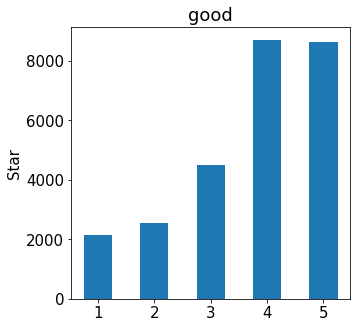

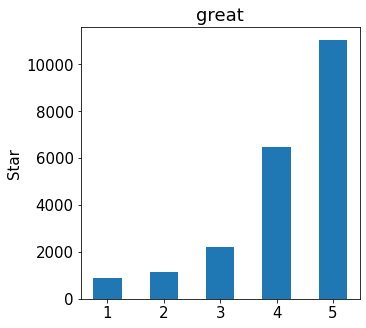

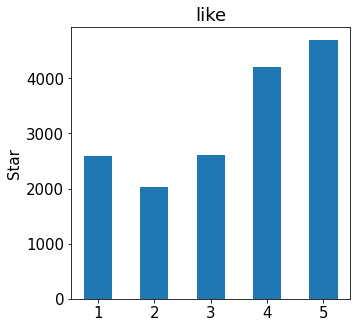

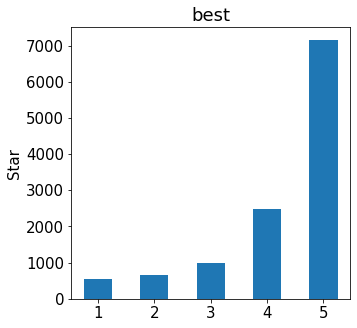

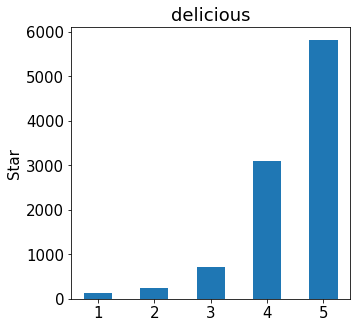

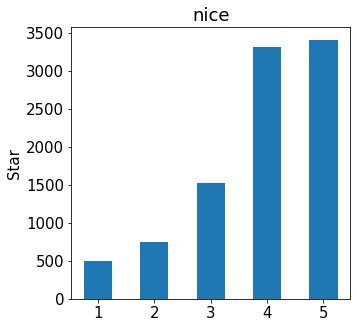

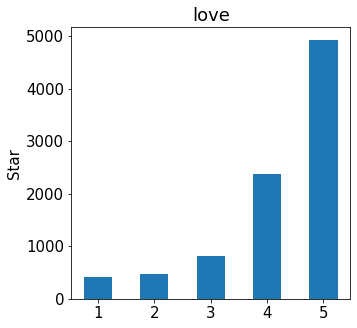

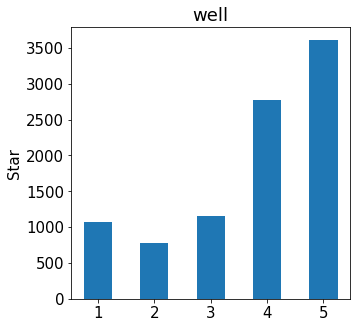

In [41]:
star_distribution_word(pizza_review_business,[
'good',
'great',
'like',
'best',
'delicious',
'nice',
'love',
'well',])

As you can see, positive words occur more times in 5 stars review than 1 or 2 stars review. 

# Star Distribution of Negative Words

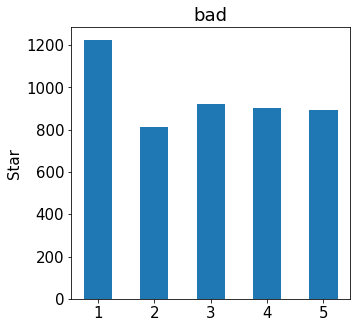

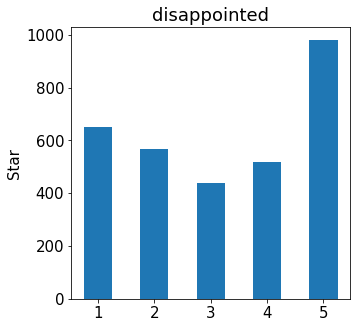

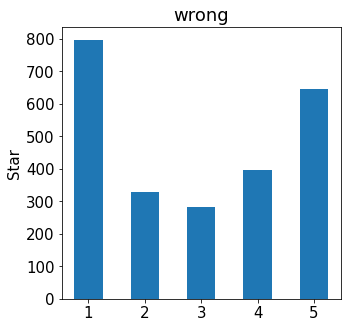

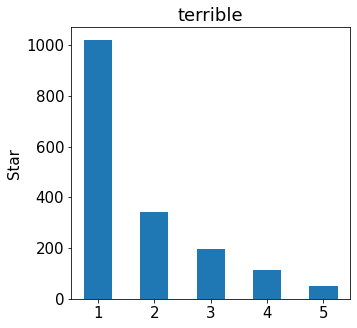

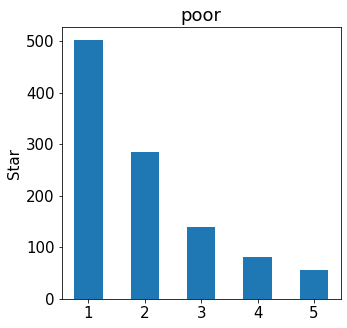

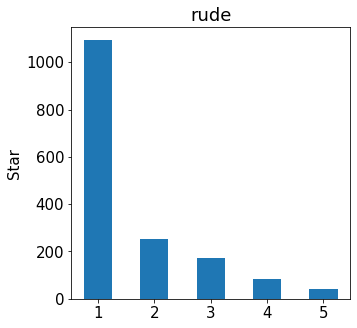

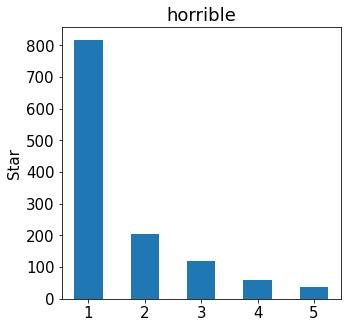

In [42]:
star_distribution_word(pizza_review_business,[
'bad',
'disappointed',
'wrong',
'terrible',
'poor',
'rude',
'horrible'])

The occurance of negative words in stars are complex, some words such as poor and horrible occurs more times in 1 star review.

For one word postive or negative, our groups think that it is not good to judge from star rating. Because there is too many factors affect star rating. We prefer to judge word positive and negative according to their semantic meanning.

# Star Distribution of Foods Words

Now we find words connected with food. 

In [43]:
def food_related_word(i):
    syns = wn.synsets(str(i), pos = wn.NOUN)
    for syn in syns:
        if 'food' in syn.lexname():
            return True
    return False
Food_Word=[]
for i in Word_Freq['Word']:
    if food_related_word(i) == True:
        Food_Word.append(i)

In [44]:
Food_Word

['pizza',
 'food',
 'sauce',
 'cheese',
 'salad',
 'delicious',
 'menu',
 'chicken',
 'beer',
 'table',
 'drink',
 'topping',
 'bread',
 'slice',
 'wing',
 'dinner',
 'meal',
 'taste',
 'side',
 'pasta',
 'lunch',
 'dish',
 'bit',
 'pepperoni',
 'special',
 'sandwich',
 'pie',
 'meatball',
 'wine',
 'sausage',
 'garlic',
 'meat',
 'appetizer',
 'tomato',
 'burger',
 'ingredient',
 'mushroom',
 'pepper',
 'sweet',
 'portion',
 'dough',
 'dessert',
 'dressing',
 'must',
 'onion',
 'soup',
 'steak',
 'bite',
 'white',
 'piece',
 'plate',
 'bacon',
 'game',
 'olive',
 'sub',
 'mozzarella',
 'buffalo',
 'hoagie',
 'green',
 'water',
 'joint',
 'cut',
 'potato',
 'entree',
 'veggie',
 'stick',
 'oil',
 'cream',
 'course',
 'roll',
 'shrimp',
 'parmesan',
 'spinach',
 'date',
 'beef',
 'fish',
 'egg',
 'ice',
 'split',
 'gluten',
 'takeout',
 'brunch',
 'breadstick',
 'marinara',
 'lettuce',
 'hoagy',
 'cake',
 'spaghetti',
 'breakfast',
 'pork',
 'cocktail',
 'crisp',
 'basil',
 'chip',
 'la

In [45]:
Food_Word_Data=pd.DataFrame(Food_Word)

In [46]:
Food_Word_Data.to_csv('data/Food_Word_Data.csv')

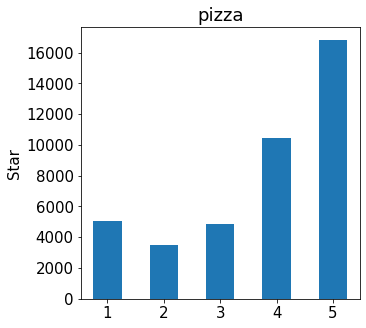

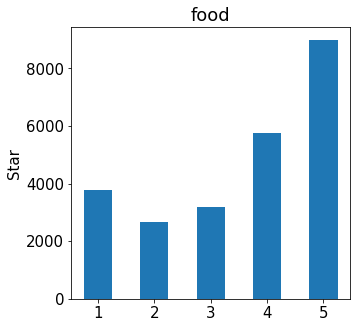

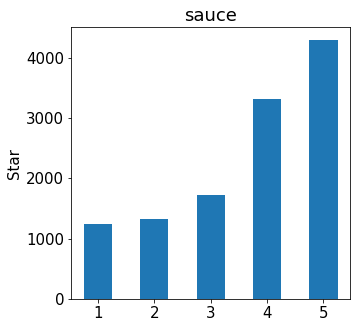

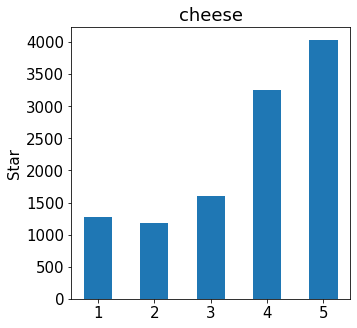

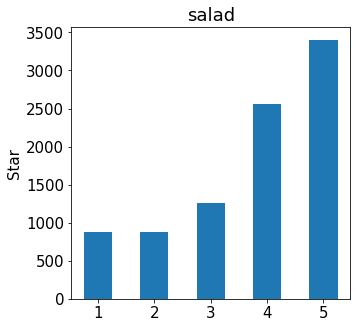

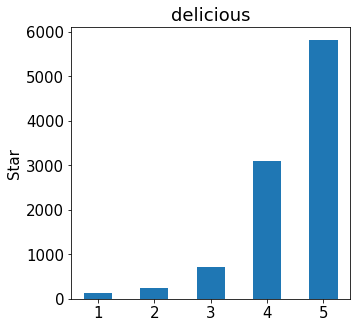

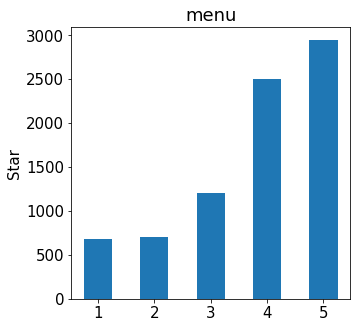

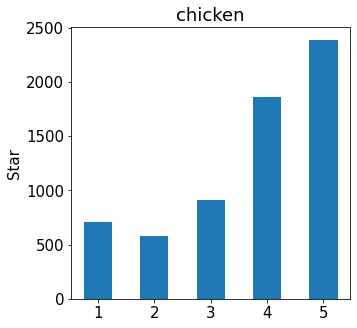

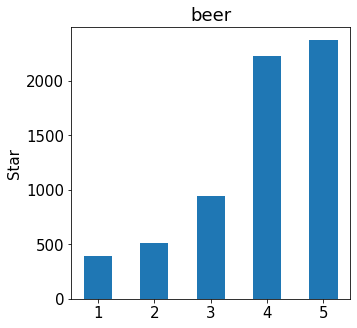

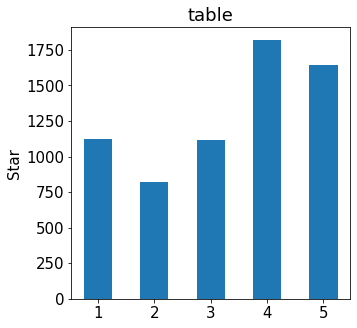

In [47]:
star_distribution_word(pizza_review_business,Food_Word[0:10])

As you can see, most of words occur more time in 4 or 5 stars review.

In the following code, we will examine food word carefully. Here we only give some plots. 

# Star Distribution of WiFi, Park, Book, TV

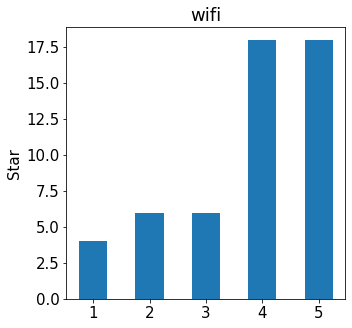

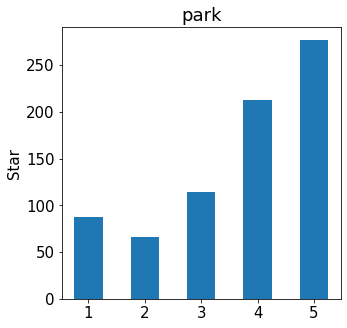

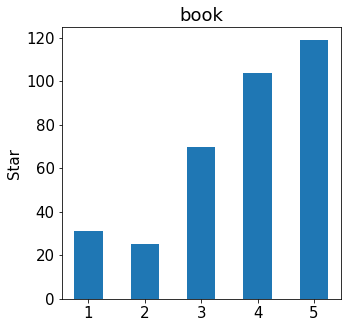

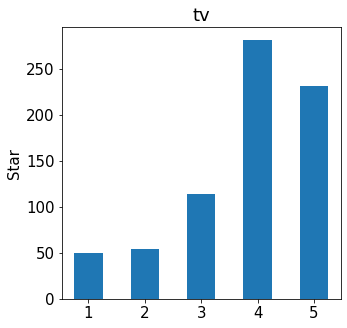

In [48]:
star_distribution_word(pizza_review_business,["wifi","park","book",'tv'])

All four category occurs more time in 4 or 5 stars review. 

# WordCloud

WordCloud tell you how frequency in our txt, the more commonly the term appears, the larger the word appears in the image generated.

In [49]:
from wordcloud import WordCloud, STOPWORDS

In [50]:
Up_Four_Stars_Review=pizza_review_business[pizza_review_business["stars"]>=4]
Low_Two_Stars_Review=pizza_review_business[pizza_review_business["stars"]<=2]

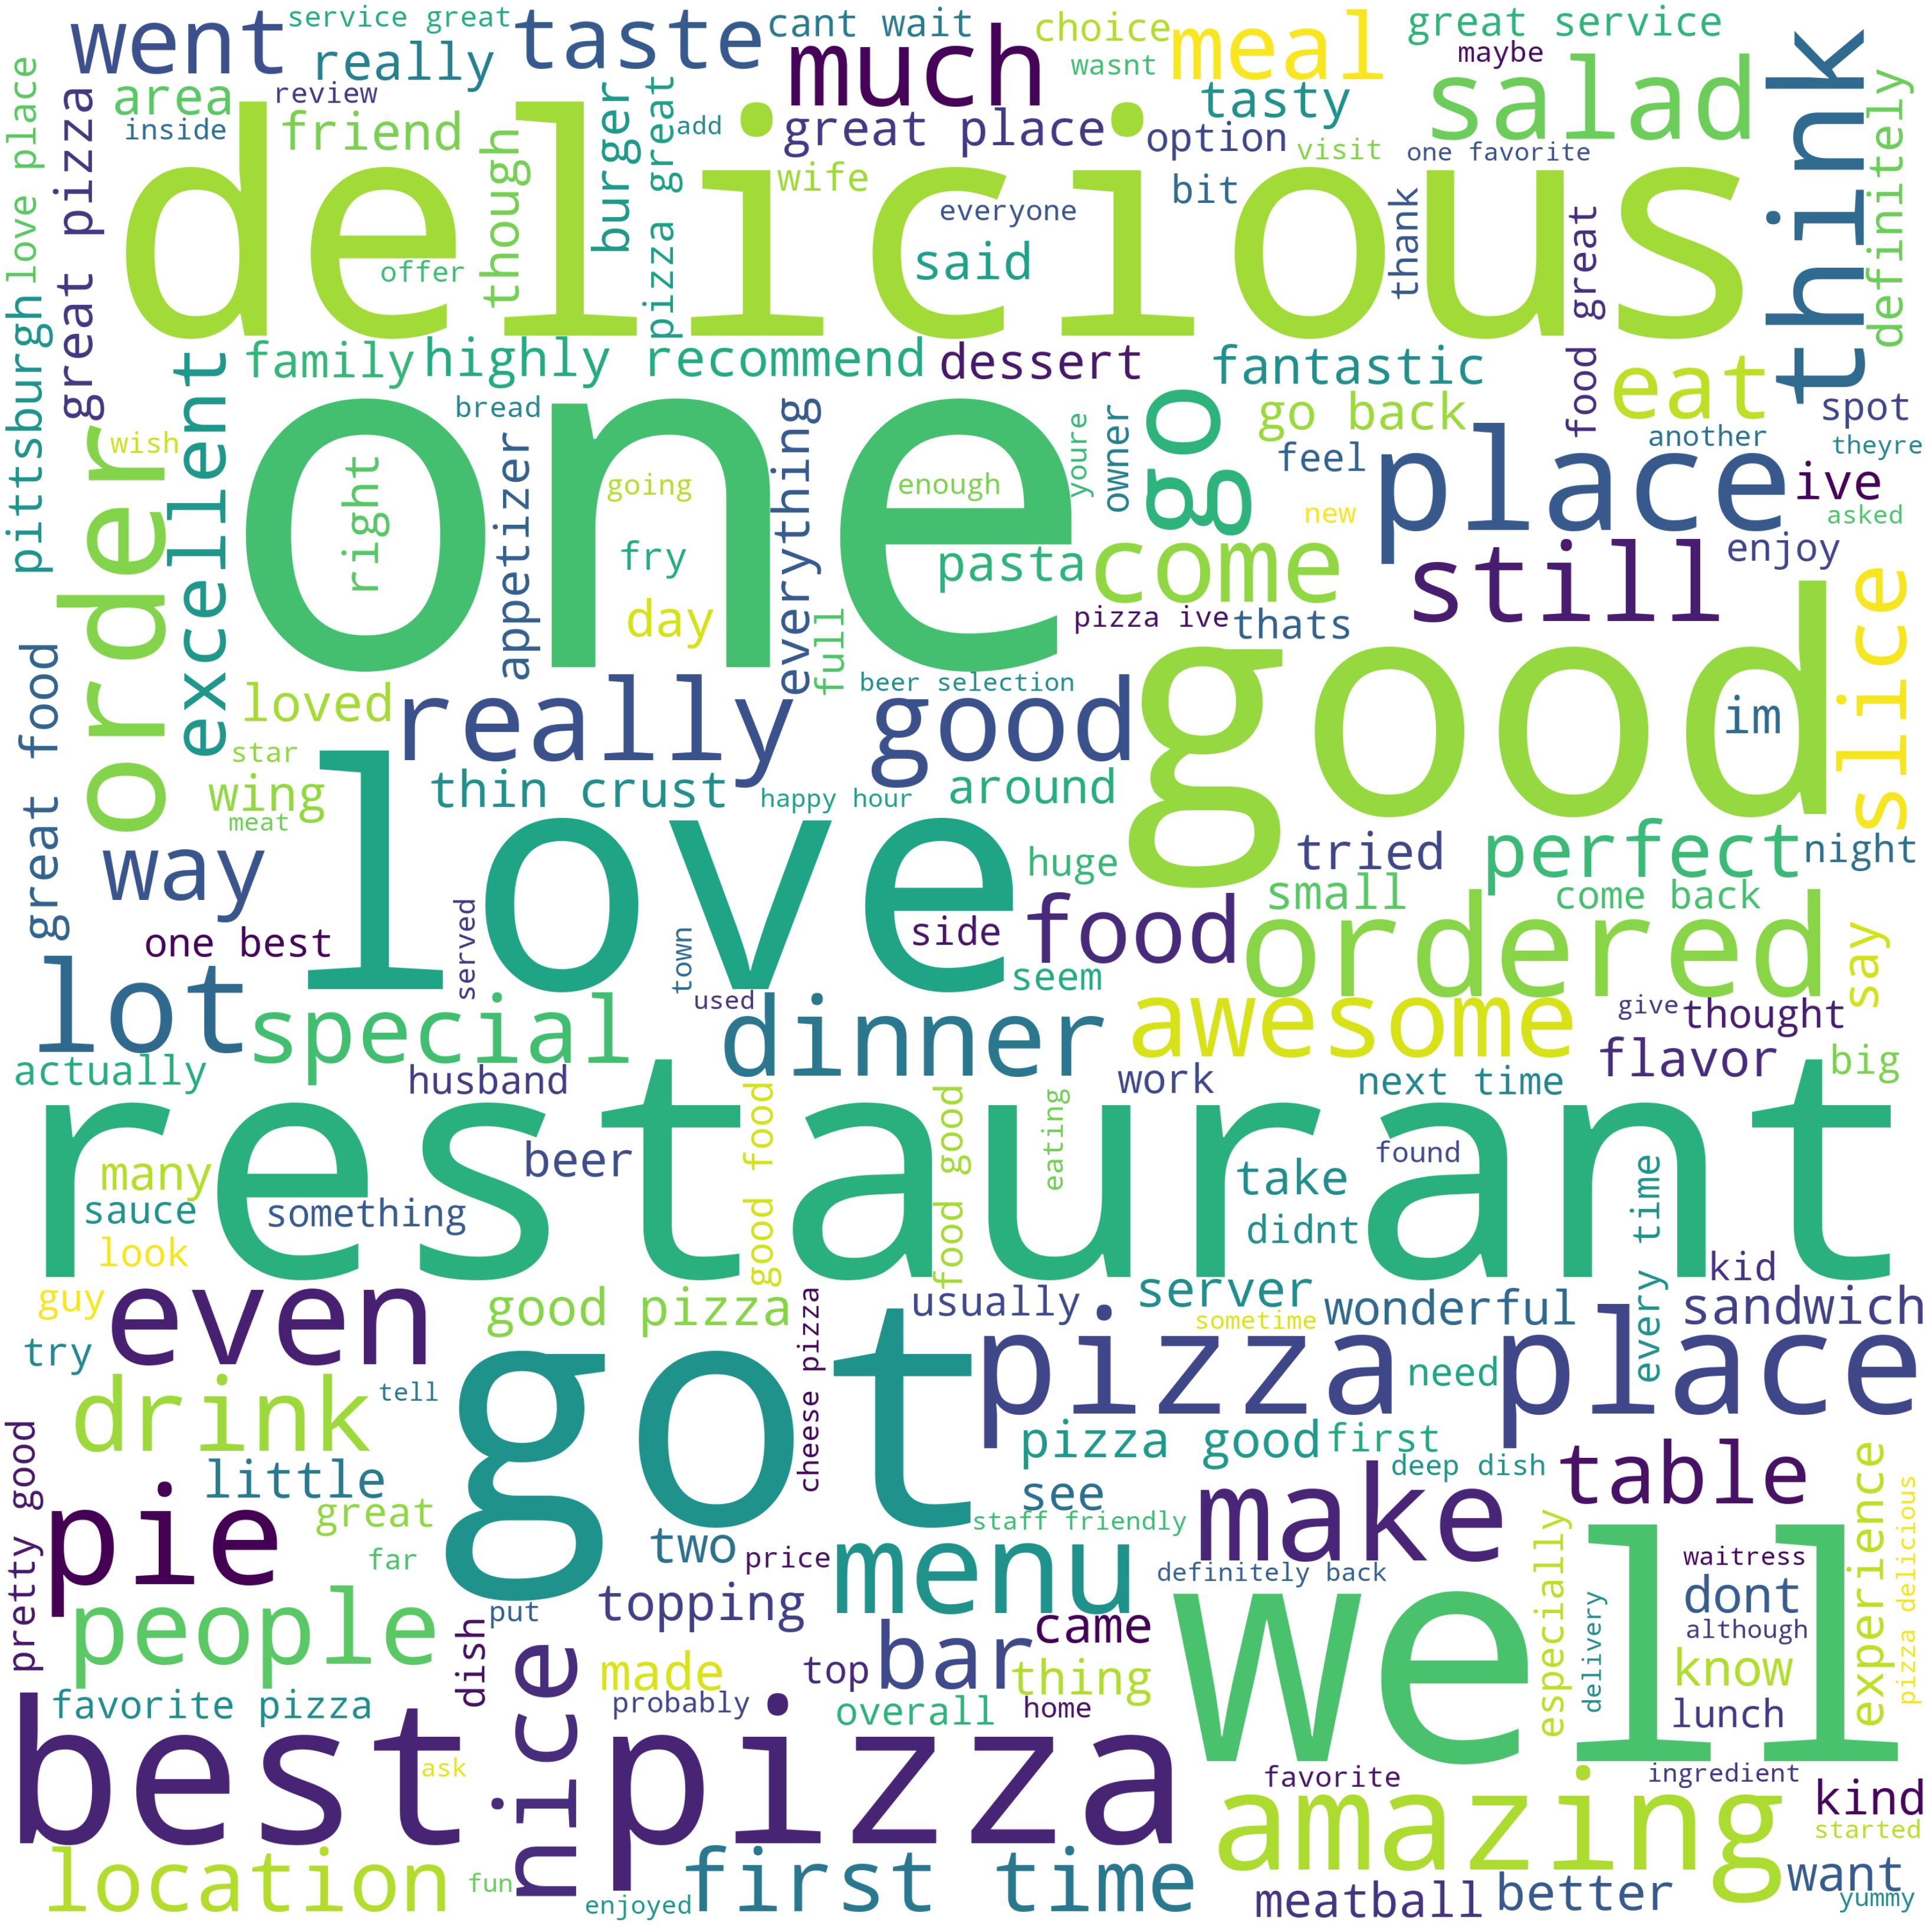

In [51]:
wordcloud = WordCloud(
    width = 3000,
    height = 3000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(" ".join(Up_Four_Stars_Review["clean_review"].tolist()))
fig = plt.figure(
    figsize = (60, 60))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("figure/Positive_Word_Cloud.png")

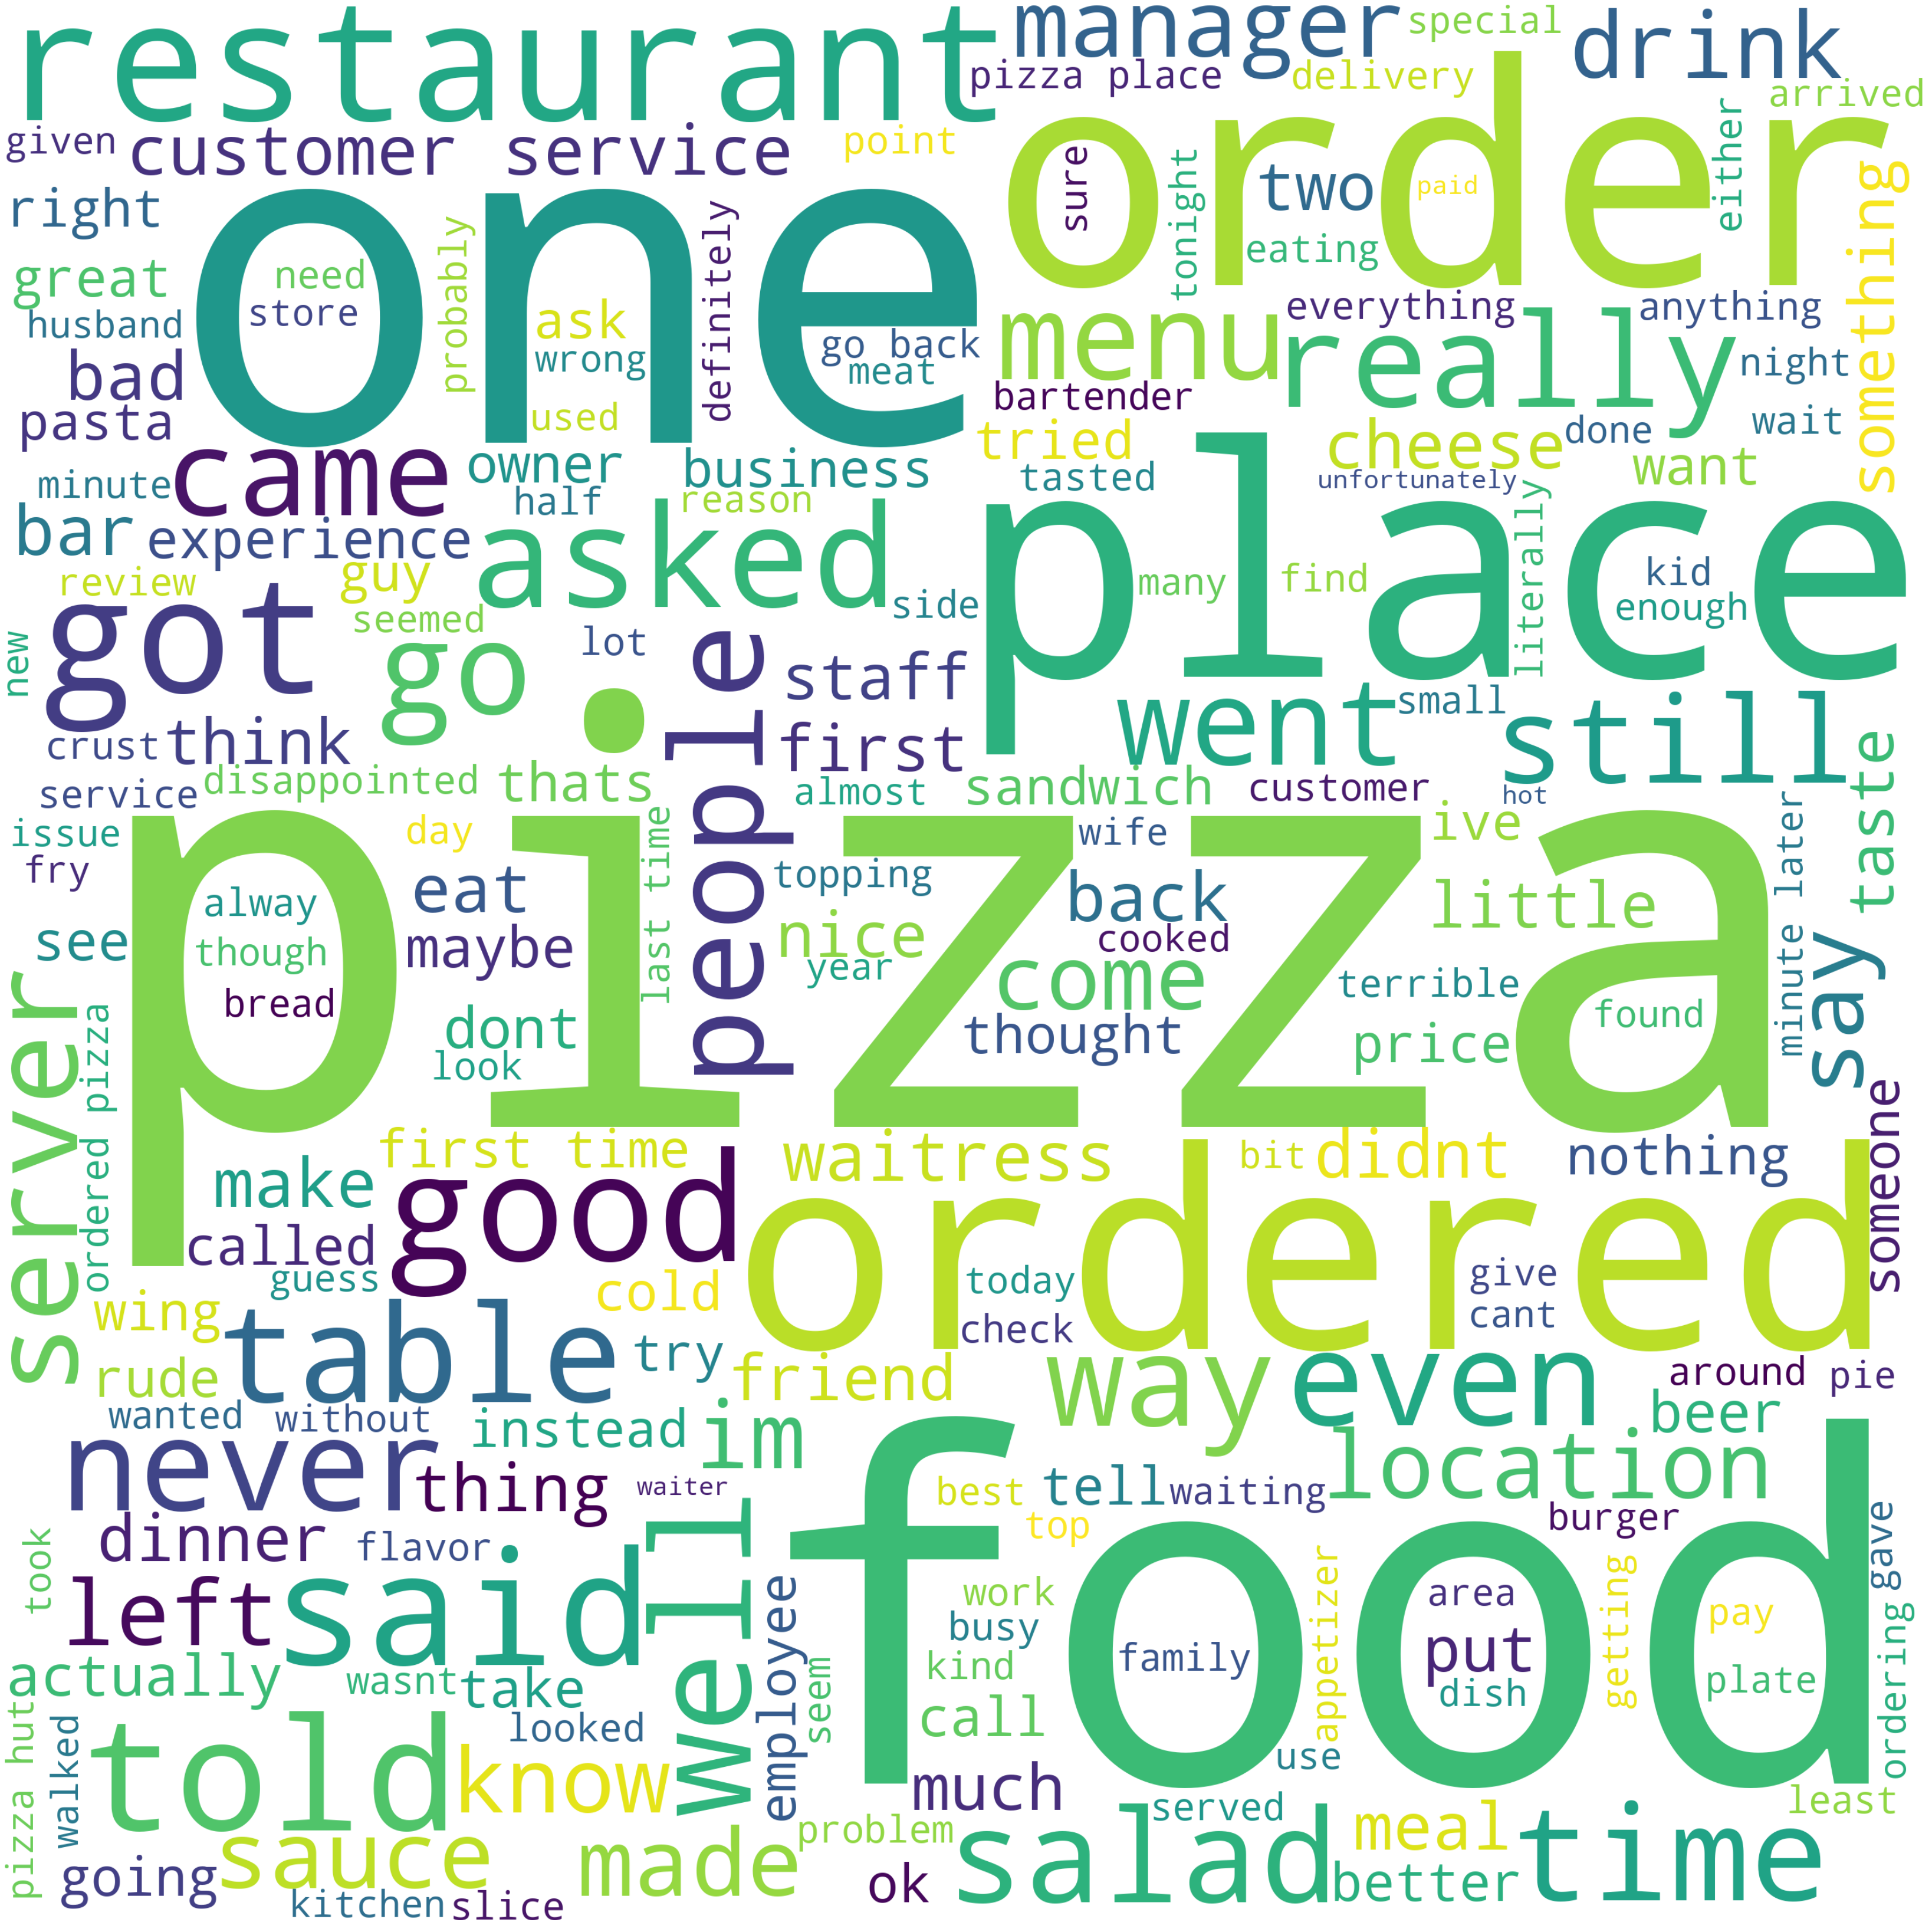

In [52]:
wordcloud = WordCloud(
    width = 3000,
    height = 3000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(" ".join(Low_Two_Stars_Review["clean_review"].tolist()))
fig = plt.figure(
    figsize = (60, 60))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("figure/Negative_Word_Cloud.png")

As you can see,  some words occur many times such as "one" in both positive and negative word cloud. 

In [53]:
pizza_review_business

review_id                 user_id             business_id  \
0      hfXVxrlD6fr1kXfz6sR13Q  7nIzgNF7YzI-UAyYr3y9hw  J9f-9Prw2YVM-fiZqv2fmQ   
1      EDQpLLFiAxeSxWI5ipwzBQ  SkueY7hVsyXmYItELoodGw  lpel3pRFAzlow7u2TJMz4Q   
2      RWmT90rP7wYo57dG1cyvww  n3ahpmnEXsZYj3nbVMoUmg  Zja7ykq3icDzkN20XX6j1w   
3      0jduztItUhOh3FzKGjMxZQ  lVbPEaNUxFjwUydjentrYw  hr0vxeTzlHx6fTpSSmu2AA   
4      sxfmzhMvZ8LlI1x4fhNjKg  SQKRGzDa7qd8qHb13Z2-Hg  F4kjKxXXyn3e-BYVb1mWcg   
...                       ...                     ...                     ...   
67151  gcNRaJMDlSVs8YlqwpsRuw  _Rgn4SZT2wXyQnW9AD9Tog  nR3u-wQ99bop6IdGoU38KQ   
67152  yFxDOdiDb8HPaK1io81kiw  4r33dXcE1oYZxjONrhxTiA  yT1Ad3auuw1jAJEZHr7Yqw   
67153  Z_xmoLgIMB4As90t0a5eBQ  Iy6HkAzFcpeU7GF0e1FRSA  R13VkcyUIU3xG2fRFbBvBA   
67154  CzYRFCnkbqOVb3WIMMrbfw  TP9Tz7gcAfK-BeT16qpZ2w  M-caugKzJ9qLOmCBfD9Nyg   
67155  ZhUeFHPAjUbEKRnYO_pl_w  WS-GsWbN4ltzigWl01t8Xw  o_dWM_hlpgjjd7F15UPjZw   

       stars                                               text  \
0          2  Parking is tough to get here so I don't get to...   
1          4  The server had an extensive knowledge of wines...   
2          5  Fast Forward\n\nEvery trip from NYC to Pitt in...   
3          5  By far my favorite Cleveland/Akron restaurant!...   
4          4  All food is good here I usually get the Italia...   
...      ...                                                ...   
67151      1  I'm originally from the other side of Ohio and...   
67152      5  Yes, yes, YES!! We loved going to the place in...   
67153      4  Went here for a lunch meeting amidst s typical...   
67154      1  My wife and I have eaten at La Brioche at leas...   
67155      3  First let me say Lindys in Columbus is one of ...   

                      date                          name  \
0      2013-09-04 04:35:27         Original Hot Dog Shop   
1      2015-04-28 19:28:12               Humble Wine Bar   
2      2013-07-12 23:08:35                Aiello's Pizza   
3      2013-12-07 01:09:23                       Russo's   
4      2014-10-27 01:42:40  Tnt Dynamite Pizza & Hoagies   
...                    ...                           ...   
67151  2019-09-21 00:24:03                   Jet's Pizza   
67152  2019-09-03 04:32:16                    Mercurio’s   
67153  2019-12-11 16:18:26                    56 Kitchen   
67154  2017-06-13 02:14:53          La Brioche True Food   
67155  2019-11-16 14:37:10           Lindey's Lake House   

                       address        city   latitude  ...  \
0              3901 Forbes Ave  Pittsburgh  40.442147  ...   
1            15400 Detroit Ave   Cleveland  41.485075  ...   
2              2112 Murray Ave  Pittsburgh  40.433261  ...   
3                4895 State Rd   Cleveland  41.202242  ...   
4            450 Pittsburgh St  Pittsburgh  40.540954  ...   
...                        ...         ...        ...  ...   
67151  35535 Euclid Ave, Ste 8   Cleveland  41.626690  ...   
67152         1335 Freeport Rd  Pittsburgh  40.489726  ...   
67153          1433 Som Ctr Rd   Cleveland  41.521496  ...   
67154      2862 University Ave     Madison  43.075354  ...   
67155  2101 Richmond Rd, Ste L   Cleveland  41.500783  ...   

       BusinessParking_validated  BusinessParking               GoodForMeal  \
0                          False           street           lunch latenight   
1                          False       lot street  dessert dinner latenight   
2                          False           street              lunch dinner   
3                          False              lot                    dinner   
4                          False              lot                       NaN   
...                          ...              ...                       ...   
67151                      False              lot                     lunch   
67152                      False              lot                       NaN   
67153                      False              lot                

In [54]:
pizza_business_clean_review=pizza_review_business[["review_id","clean_review"]]
pizza_business_clean_review.to_csv('data/pizza_business_clean_review.csv')